# Dataset Exploration

## Introduction

In [37]:
import pandas as pd

In [38]:
PATH = '../gaming/playstation/'
df_achievements = pd.read_csv(PATH + 'achievements.csv')
df_games = pd.read_csv(PATH + 'games.csv')
df_history = pd.read_csv(PATH + 'history.csv')
df_players = pd.read_csv(PATH + 'players.csv')
df_prices = pd.read_csv(PATH + 'prices.csv')
df_purchased_games = pd.read_csv(PATH + 'purchased_games.csv')

In [39]:
''' Used to calculate the total sells of each game... not required anymore
def calculate_purchases(df_purchased_games):
    df_purchased_games['library'] = df_purchased_games['library'].apply(ast.literal_eval)
    exploded = df_purchased_games.explode('library')
    game_counts = exploded['library'].value_counts().reset_index()
    game_counts.columns = ['game_id', 'sales']
    result_df = game_counts.reset_index(drop=True)
    return result_df

def attach_game_information(df_purchases, df_games):
    merged_df = pd.merge(
        df_purchases, 
        df_games, 
        left_on='game_id', 
        right_on='gameid',
        how='inner'
    )
    merged_df.drop(columns=['gameid'], inplace=True)
    return merged_df

def attach_game_price(df_games, df_prices):
    merged_df = pd.merge(
        df_games, 
        df_prices, 
        left_on='game_id', 
        right_on='gameid',
        how='inner'
    )
    merged_df.drop(columns=['gameid'], inplace=True)
    return merged_df

def merge_dataset(folder):
    df_games = pd.read_csv('../gaming/' + folder + '/games.csv')
    df_prices = pd.read_csv('../gaming/' + folder + '/prices.csv')
    df_purchased_games = pd.read_csv('../gaming/' + folder + '/purchased_games.csv')

    df_sum_purchased = calculate_purchases(df_purchased_games)
    df_games_with_sales = attach_game_information(df_sum_purchased, df_games)
    df_games_with_sales_and_price = attach_game_price(df_games_with_sales, df_prices)

    return df_games_with_sales_and_price

merge_dataset('playstation').head()
'''

" Used to calculate the total sells of each game... not required anymore\ndef calculate_purchases(df_purchased_games):\n    df_purchased_games['library'] = df_purchased_games['library'].apply(ast.literal_eval)\n    exploded = df_purchased_games.explode('library')\n    game_counts = exploded['library'].value_counts().reset_index()\n    game_counts.columns = ['game_id', 'sales']\n    result_df = game_counts.reset_index(drop=True)\n    return result_df\n\ndef attach_game_information(df_purchases, df_games):\n    merged_df = pd.merge(\n        df_purchases, \n        df_games, \n        left_on='game_id', \n        right_on='gameid',\n        how='inner'\n    )\n    merged_df.drop(columns=['gameid'], inplace=True)\n    return merged_df\n\ndef attach_game_price(df_games, df_prices):\n    merged_df = pd.merge(\n        df_games, \n        df_prices, \n        left_on='game_id', \n        right_on='gameid',\n        how='inner'\n    )\n    merged_df.drop(columns=['gameid'], inplace=True)\n   

## Transformation to target dataset

In [40]:
# Get the sum of purchased games
def sum_games(str_list):
    list = eval(str_list)
    return len(list)

purchased_games = df_purchased_games['library'].apply(sum_games)
purchased_games

df1 = df_purchased_games.copy()
df1['purchased_games'] = purchased_games
df1.head()

,playerid,library,purchased_games
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172


In [41]:
# Get the sum of the most highest achievements for each player
platinum_achievements = set(df_achievements[df_achievements['rarity'].str.strip() == 'Platinum']['achievementid'].astype(str).str.strip())

def high_achievements(playerId):
    achievement_ids = df_history[df_history['playerid'] == playerId]['achievementid']   
    platinum_count = sum(achievement_id in platinum_achievements for achievement_id in achievement_ids)
    return platinum_count

df1['highest_achievements'] = df1['playerid'].apply(high_achievements)
df1.head()

,playerid,library,purchased_games,highest_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0


In [42]:
# Get the sum of the medium achievements for each player
medium_achievements_data = set(df_achievements[df_achievements['rarity'].str.strip().isin(['Gold', 'Silver'])]['achievementid'].astype(str).str.strip())

def medium_achievements(playerId):
    achievement_ids = df_history[df_history['playerid'] == playerId]['achievementid']   
    medium_count = sum(achievement_id in medium_achievements_data for achievement_id in achievement_ids)
    return medium_count

df1['medium_achievements'] = df1['playerid'].apply(medium_achievements)
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0


In [43]:
# Get the sum of the lowest achievements for each player
lowest_achievements_data = set(df_achievements[df_achievements['rarity'].str.strip() == 'Bronze']['achievementid'].astype(str).str.strip())

def lowest_achievements(playerId):
    achievement_ids = df_history[df_history['playerid'] == playerId]['achievementid']   
    lowest_count = sum(achievement_id in lowest_achievements_data for achievement_id in achievement_ids)
    return lowest_count

df1['lowest_achievements'] = df1['playerid'].apply(lowest_achievements)
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0


In [44]:
# Get the most played genre by each player
def clean_genre(genre):
    if isinstance(genre, list):
        return genre
    elif isinstance(genre, str):
        try:
            return eval(genre) if genre.startswith('[') and genre.endswith(']') else [genre]
        except:
            return [genre]
    else:
        return []

game_genres_dict = df_games.set_index('gameid')['genres'].apply(clean_genre).to_dict()


def greatest_genre(library_str):
    library_list = eval(library_str)

    all_genres = []
    for game_id in library_list:
        all_genres.extend(game_genres_dict.get(game_id, []))
    
    genre_series = pd.Series(all_genres)
    most_common_genre = genre_series.mode()[0] if not genre_series.empty else None
    return most_common_genre

df1['most_played_genre'] = df1['library'].apply(greatest_genre)
df1.head()



,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action


Before putting the money spent for each player, we are going to fill null values with the average (price)

In [45]:
df_prices['usd'] = df_prices['usd'].fillna(df_prices['usd'].mean())

In [46]:
# Get the total spent money in us
df1['library'] = df1['library'].apply(lambda x: [str(i).strip() for i in eval(x)])
df_prices['gameid'] = df_prices['gameid'].astype(str).str.strip()

library_expanded = df1[['playerid', 'library']].explode('library')
library_with_prices = library_expanded.merge(df_prices[['gameid', 'usd']], how='left', left_on='library', right_on='gameid')
total_spent_df = library_with_prices.groupby('playerid')['usd'].sum().reset_index()
df1 = df1.merge(total_spent_df[['playerid', 'usd']], on='playerid', how='left')

df1['total_spent_us'] = df1['usd']
df1.drop('usd', axis=1, inplace=True)

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478


In [47]:
# Getting a score of how fast a player is doing his first achievement on all of its games
df1['library'] = df1['library'].apply(lambda x: [str(i).strip() for i in x])

library_expanded = df1[['playerid', 'library']].explode('library')

library_expanded['library'] = library_expanded['library'].astype(str)
df_games['gameid'] = df_games['gameid'].astype(str)

library_with_release_dates = library_expanded.merge(df_games[['gameid', 'release_date']], how='left', left_on='library', right_on='gameid')
library_with_release_dates.dropna(inplace=True)

df_history['gameid'] = df_history['achievementid'].apply(lambda x: x.split('_')[0])

first_achievements = df_history.groupby(['playerid', 'gameid'])['date_acquired'].min().reset_index()

library_with_achievements = library_with_release_dates.merge(first_achievements[['playerid', 'gameid', 'date_acquired']], how='left', on=['playerid', 'gameid'])

library_with_achievements['release_date'] = pd.to_datetime(library_with_achievements['release_date'])
library_with_achievements['date_acquired'] = pd.to_datetime(library_with_achievements['date_acquired'])

library_with_achievements['time_to_first_achievement'] = (library_with_achievements['date_acquired'] - library_with_achievements['release_date']).dt.days

mean_time_to_first_achievement = library_with_achievements.groupby('playerid')['time_to_first_achievement'].mean().reset_index()

df1 = df1.merge(mean_time_to_first_achievement[['playerid', 'time_to_first_achievement']], on='playerid', how='left')

df1['achievement_rate'] = df1['time_to_first_achievement']
df1.drop('time_to_first_achievement', axis=1, inplace=True)

df1['achievement_rate'] = df1['achievement_rate'].fillna('No Value')

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,No Value
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,No Value
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,No Value
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,229.981308
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,No Value


Finishing the details of the dataset

In [48]:
# Put a label to the achievement rate
def define_achievement_label(achievement_value):
    if isinstance(achievement_value, float):
        value = float(achievement_value)
        if value >= 0 and value <= 3:
            return 'Extreme'
        if value > 3 and value <= 6:
            return 'High'
        if value > 6 and value <= 31:
            return 'Low'
        else:
            return 'Casual'
    else:
        return 'No Value'


df1['achievement_rate'] = df1['achievement_rate'].apply(define_achievement_label)
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,No Value
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,No Value
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,No Value
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,Casual
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,No Value


In [49]:
# Add a date to the last achievement activity of each player
df_history['date_acquired'] = pd.to_datetime(df_history['date_acquired'])

last_achievement = df_history.groupby('playerid')['date_acquired'].max().reset_index()
df1 = df1.merge(last_achievement, on='playerid', how='left')
df1.rename(columns={'date_acquired': 'last_achievement_date'}, inplace=True)
df1['last_achievement_date'] = df1['last_achievement_date'].fillna('No Value')

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,No Value,No Value
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,No Value,No Value
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,No Value,No Value
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,Casual,2024-11-28 10:23:24
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,No Value,No Value


In [50]:
library_with_release_dates

,playerid,library,gameid,release_date
0,268071,14972,14972,2016-11-11
1,268071,417905,417905,2020-11-12
2,268071,14693,14693,2016-10-25
4,268071,20162,20162,2017-10-27
5,268071,461983,461983,2021-10-28
...,...,...,...,...
10893544,308899,411,411,2011-06-28
10893547,308899,255,255,2009-10-06
10893549,308899,3014,3014,2009-09-03
10893550,308899,334,334,2011-06-14


In [51]:
# Add a date in which the player got its most old game (possible date when player started to play)
library_expanded = df1[['playerid', 'library']].explode('library')
library_with_release_dates = library_expanded.merge(df_games[['gameid', 'release_date']], how='left', left_on='library', right_on='gameid')
library_with_release_dates.dropna(inplace=True)
oldest_game_dates = library_with_release_dates.groupby('playerid')['release_date'].min().reset_index()
df1 = df1.merge(oldest_game_dates[['playerid', 'release_date']], on='playerid', how='left')
df1.rename(columns={'release_date': 'started_played_on'}, inplace=True)

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,No Value,No Value,2012-08-14
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,No Value,No Value,2009-11-17
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,No Value,No Value,2009-11-10
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,No Value,No Value,2012-05-15


In [52]:
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,No Value,No Value,2012-08-14
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,No Value,No Value,2009-11-17
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,No Value,No Value,2009-11-10
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,No Value,No Value,2012-05-15


In [53]:
# Adding the country value for each player
df1 = df1.merge(df_players[['playerid', 'country', 'nickname']], on='playerid', how='left')
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,No Value,No Value,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,No Value,No Value,2009-11-17,Hong Kong,Kevins_J
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,No Value,No Value,2009-11-10,France,sebneau
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,No Value,No Value,2012-05-15,United States,Kidokyalu


In [54]:
df1.drop(columns=['library'], inplace=True)
df1.shape

(46582, 12)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46582 entries, 0 to 46581
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   playerid               46582 non-null  int64  
 1   purchased_games        46582 non-null  int64  
 2   highest_achievements   46582 non-null  int64  
 3   medium_achievements    46582 non-null  int64  
 4   lowest_achievements    46582 non-null  int64  
 5   most_played_genre      46569 non-null  object 
 6   total_spent_us         46582 non-null  float64
 7   achievement_rate       46582 non-null  object 
 8   last_achievement_date  46582 non-null  object 
 9   started_played_on      46569 non-null  object 
 10  country                46582 non-null  object 
 11  nickname               46582 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 4.3+ MB


In [56]:
# Exporting because the generation of this dataset took around 2 hours...
df1.to_csv('gamers_profile_2.csv', index=False)

## Data Engineering

In [57]:
df1 = pd.read_csv('gamers_profile_2.csv')
df1.head()

,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,231,0,0,0,Action,9794.040024,No Value,No Value,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,867,0,0,0,Indie,24707.549618,No Value,No Value,2009-11-17,Hong Kong,Kevins_J
2,253885,50,0,0,0,shooter,1671.651601,No Value,No Value,2009-11-10,France,sebneau
3,1911732,137,19,442,2056,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,172,0,0,0,Action,6010.800478,No Value,No Value,2012-05-15,United States,Kidokyalu


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Numerical Values

In [60]:
def draw_numerical(column_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df1[column_name], color='skyblue', bins=20, ax=axes[0])
    sns.boxplot(x=df1[column_name], color='lightgreen', ax=axes[1]) 

    plt.tight_layout()
    plt.show()

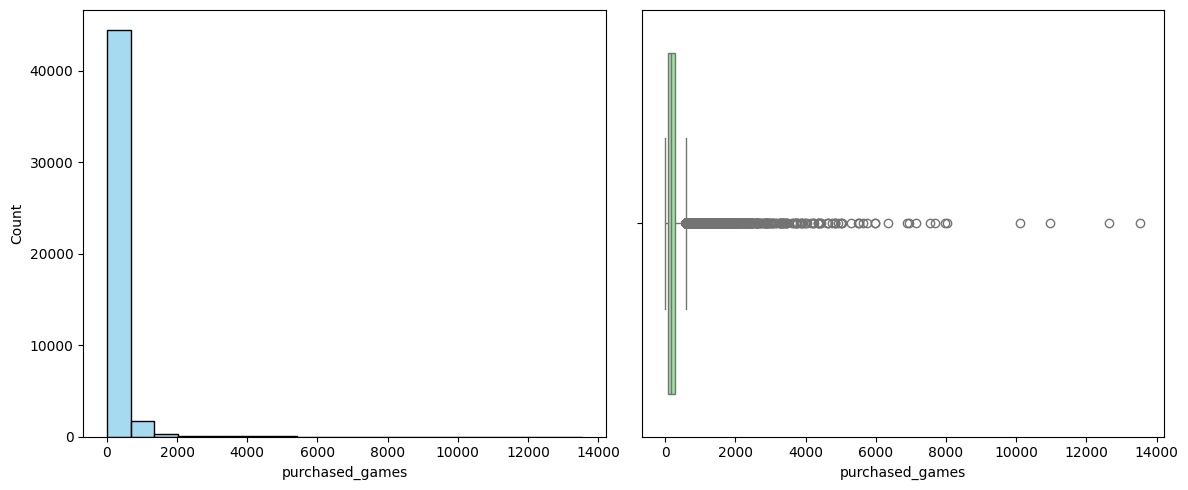

In [61]:
draw_numerical('purchased_games')

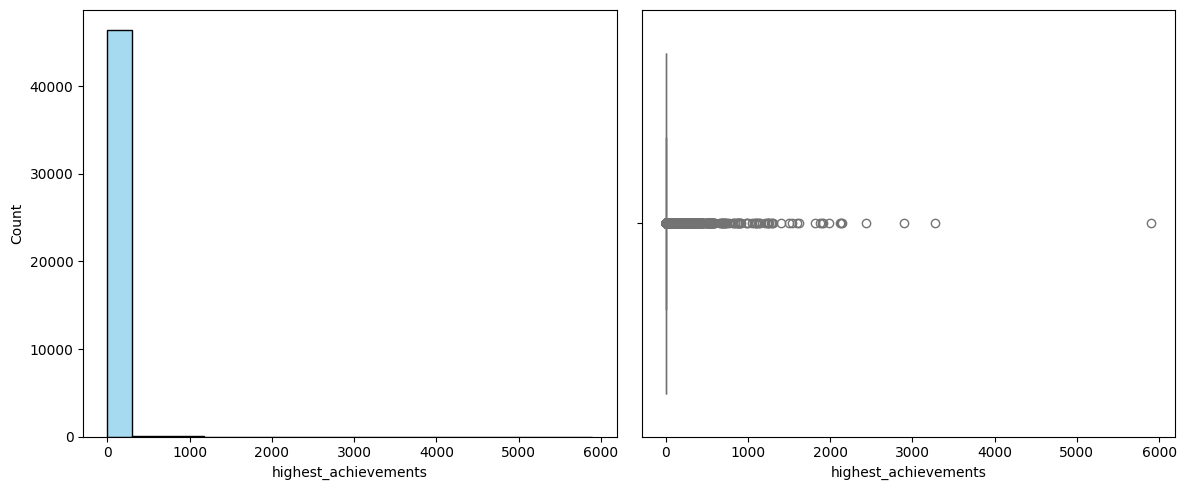

In [62]:
draw_numerical('highest_achievements')

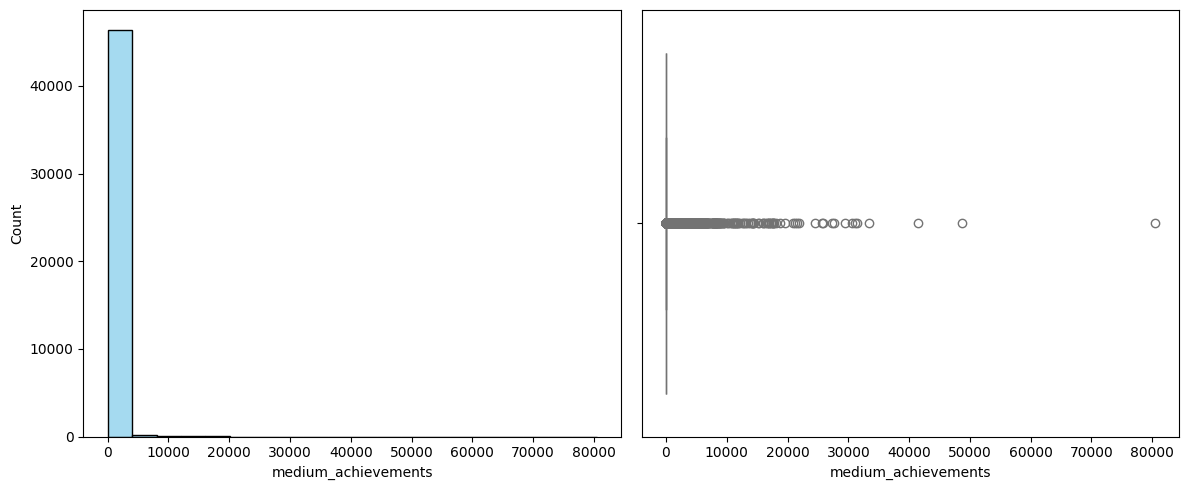

In [63]:
draw_numerical('medium_achievements')

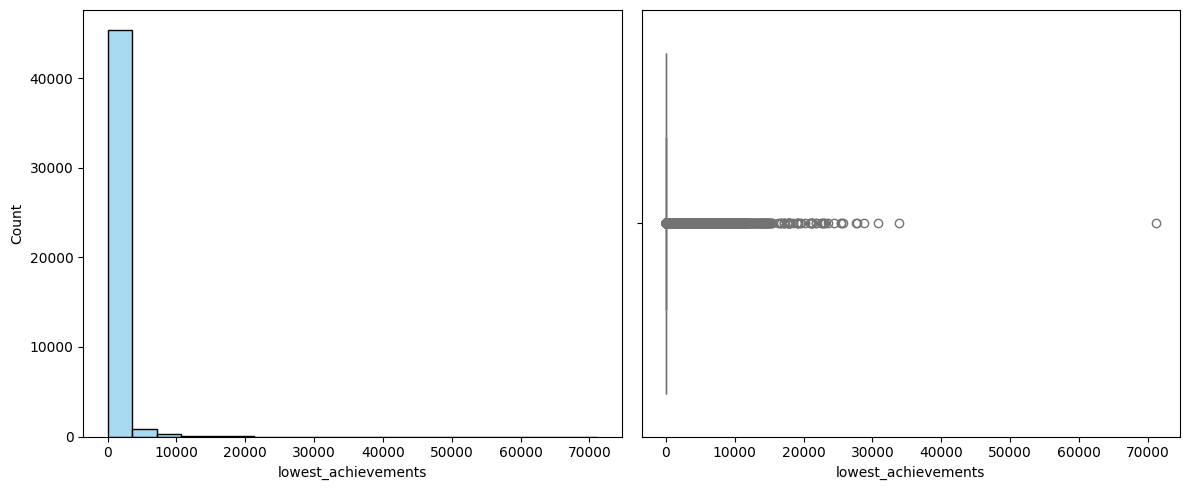

In [64]:
draw_numerical('lowest_achievements')

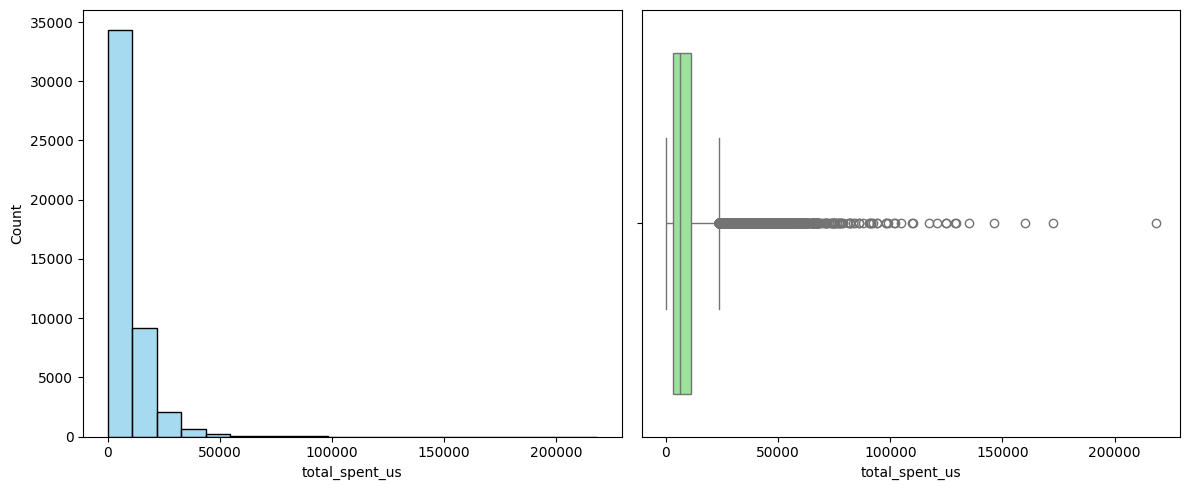

In [65]:
draw_numerical('total_spent_us')

### Categorical Values

#### Genre

In [66]:
sorted_arr = np.sort([x for x in df1['most_played_genre'].unique() if x is not None])
print(sorted(sorted_arr))

['ARCADE', 'Action', 'Action Horror', 'Action-Adventure', 'Action-RPG', 'Adventure', 'Arcade Racing', 'Automobile', 'Baseball', 'Basketball', 'Battle Royale', "Beat 'em up", 'Classics', 'Collection', 'Cue Sports', 'Cycling', 'Dungeon Crawler', 'Educational & Trivia', 'Equestrian Sports', 'FPS', 'Family', 'Fighting', 'First Person Shooter', 'Football', 'Free to Play', 'Hack & Slash', 'Indie', 'Mech', 'Music & Rhythm', 'Music+', 'Open World', 'Party', 'Platformer', 'Puzzle', 'RPG', 'Racing', 'Roguelite', 'Role Playing', 'Role-Playing Games (RPG)', "Shoot 'em up", 'Simulation', 'Simulation Racing', 'Sports', 'Stealth', 'Survival Horror', 'Third Person Shooter', 'Visual Novel', 'fighting', 'nan', 'platformer', 'puzzle', 'shooter', 'sports', 'strategy']


In [67]:
def clean_genre(genre):
    genre_lower = str(genre).lower()
    if genre_lower == 'action horror':
        return 'horror'
    elif genre_lower == 'action-adventure':
        return 'adventure'
    elif genre_lower == 'action-rpg':
        return 'rpg'
    elif genre_lower == 'arcade racing':
        return 'racing'
    elif genre_lower == 'educational & trivia':
        return 'educational'
    elif genre_lower == 'equestrian sports':
        return 'sports'
    elif genre_lower == 'first person shooter':
        return 'shooter'
    elif genre_lower == 'music & rhythm':
        return 'music'
    elif genre_lower == 'music+':
        return 'music'
    elif genre_lower == 'role playing':
        return 'rpg'
    elif genre_lower == 'role-playing games (rpg)':
        return 'rpg'
    elif genre_lower == 'shoot \'em up':
        return 'shooter'
    elif genre_lower == 'simulation racing':
        return 'racing'
    elif genre_lower == 'survival horror':
        return 'horror'
    elif genre_lower == 'third person shooter':
        return 'shooter'
    else:
        return genre_lower
    
df2 = df1.copy()
df2['most_played_genre'] = df2['most_played_genre'].apply(clean_genre)

print(df2['most_played_genre'].unique())
df2.head()

['action' 'indie' 'shooter' 'rpg' 'sports' 'free to play' 'adventure'
 'fighting' 'open world' 'football' 'platformer' 'racing' 'simulation'
 'automobile' 'party' 'puzzle' 'hack & slash' 'stealth' 'strategy' 'music'
 'nan' 'visual novel' 'cue sports' 'battle royale' 'horror' 'baseball'
 'mech' "beat 'em up" 'collection' 'fps' 'roguelite' 'family' 'classics'
 'arcade' 'educational' 'basketball' 'dungeon crawler' 'cycling']


,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,231,0,0,0,action,9794.040024,No Value,No Value,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,867,0,0,0,indie,24707.549618,No Value,No Value,2009-11-17,Hong Kong,Kevins_J
2,253885,50,0,0,0,shooter,1671.651601,No Value,No Value,2009-11-10,France,sebneau
3,1911732,137,19,442,2056,rpg,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,172,0,0,0,action,6010.800478,No Value,No Value,2012-05-15,United States,Kidokyalu


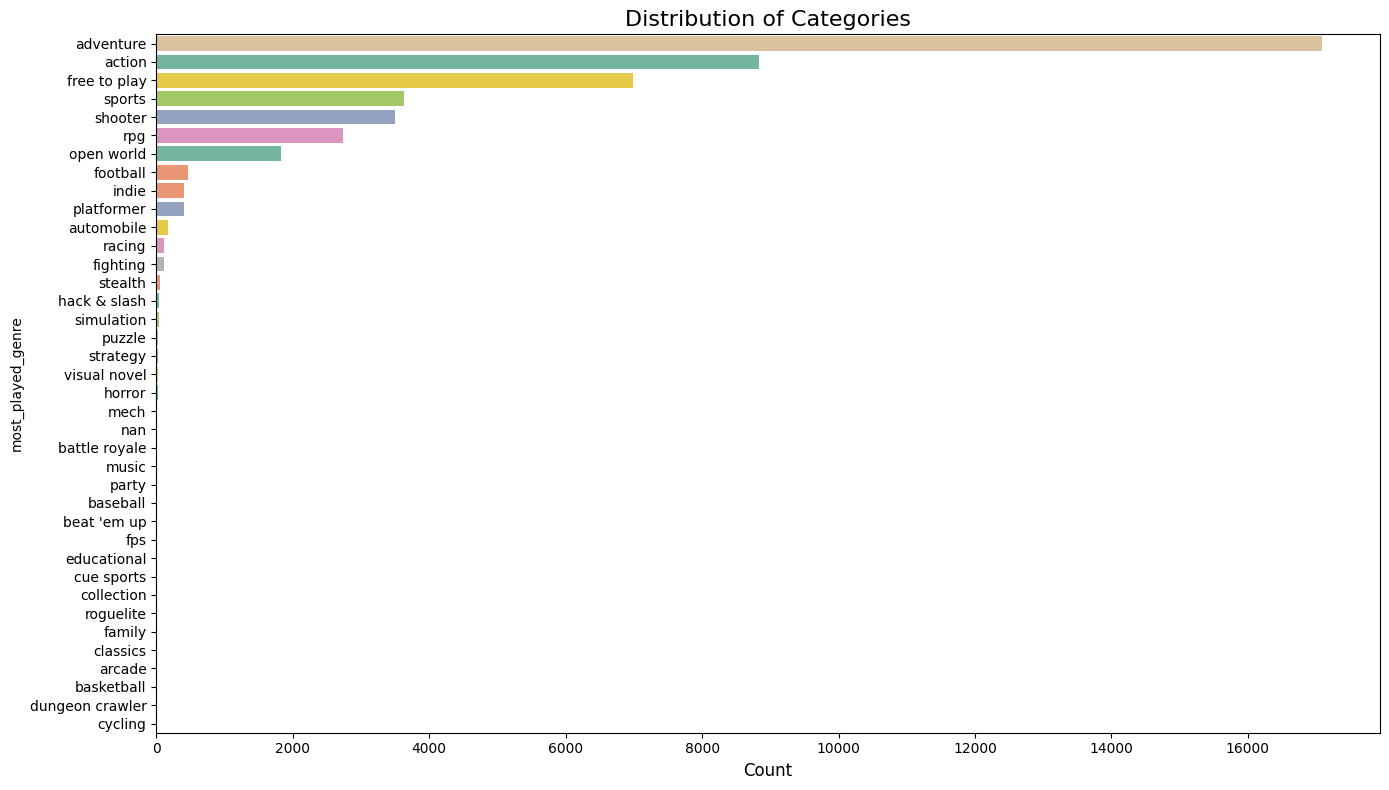

In [68]:
plt.figure(figsize=(14, 8))
sns.countplot(y='most_played_genre', 
              data=df2, 
              palette='Set2', 
              order=df2['most_played_genre'].value_counts().index, 
              hue=df2['most_played_genre'])

plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

#### achievement_rate

In [69]:
df2['achievement_rate'].unique()

array(['No Value', 'Casual', 'Low', 'Extreme', 'High'], dtype=object)

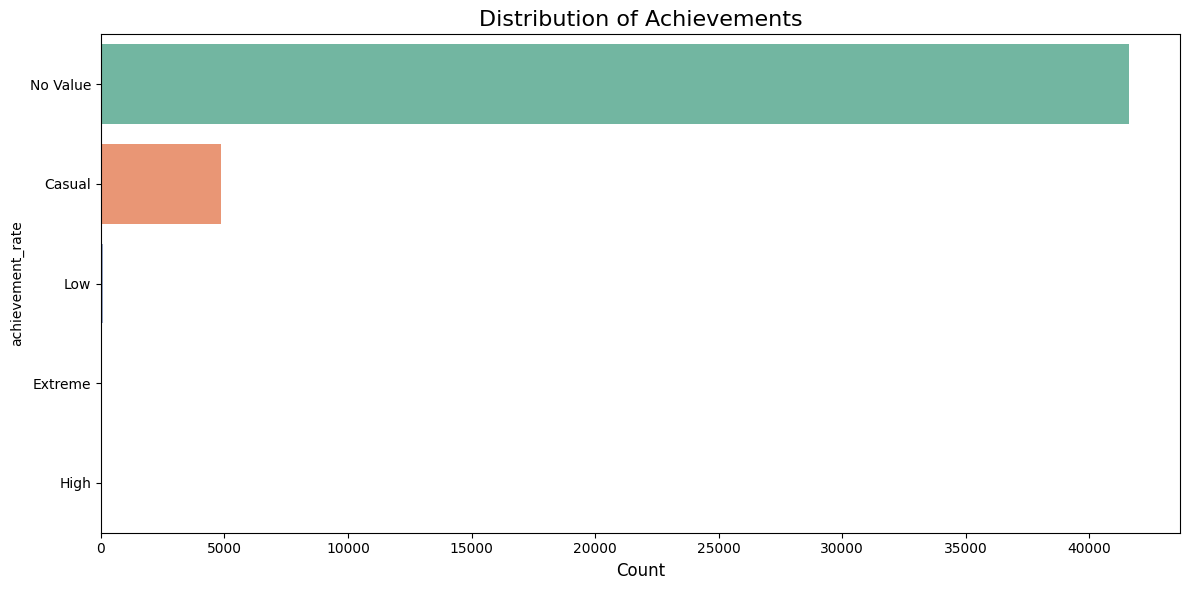

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(y='achievement_rate', 
              data=df2, 
              palette='Set2', 
              order=df2['achievement_rate'].value_counts().index, 
              hue=df2['achievement_rate'])

plt.title('Distribution of Achievements', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Since achievement_rate is categorical ordinal I will change it to values 0 to 4

In [71]:
def number_achievement_rate(achievement_rate):
    achievement_rate = str(achievement_rate)
    if achievement_rate == 'No Value':
        return 0
    elif achievement_rate == 'Casual':
        return 1
    elif achievement_rate == 'Low':
        return 2
    elif achievement_rate == 'High':
        return 3
    elif achievement_rate == 'Extreme':
        return 4
    else:
        return -1
    
df3 = df2.copy()
df3['achievement_rate'] = df3['achievement_rate'].apply(number_achievement_rate)
df3.head()

,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,231,0,0,0,action,9794.040024,0,No Value,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,867,0,0,0,indie,24707.549618,0,No Value,2009-11-17,Hong Kong,Kevins_J
2,253885,50,0,0,0,shooter,1671.651601,0,No Value,2009-11-10,France,sebneau
3,1911732,137,19,442,2056,rpg,7140.931374,1,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,172,0,0,0,action,6010.800478,0,No Value,2012-05-15,United States,Kidokyalu


#### Country

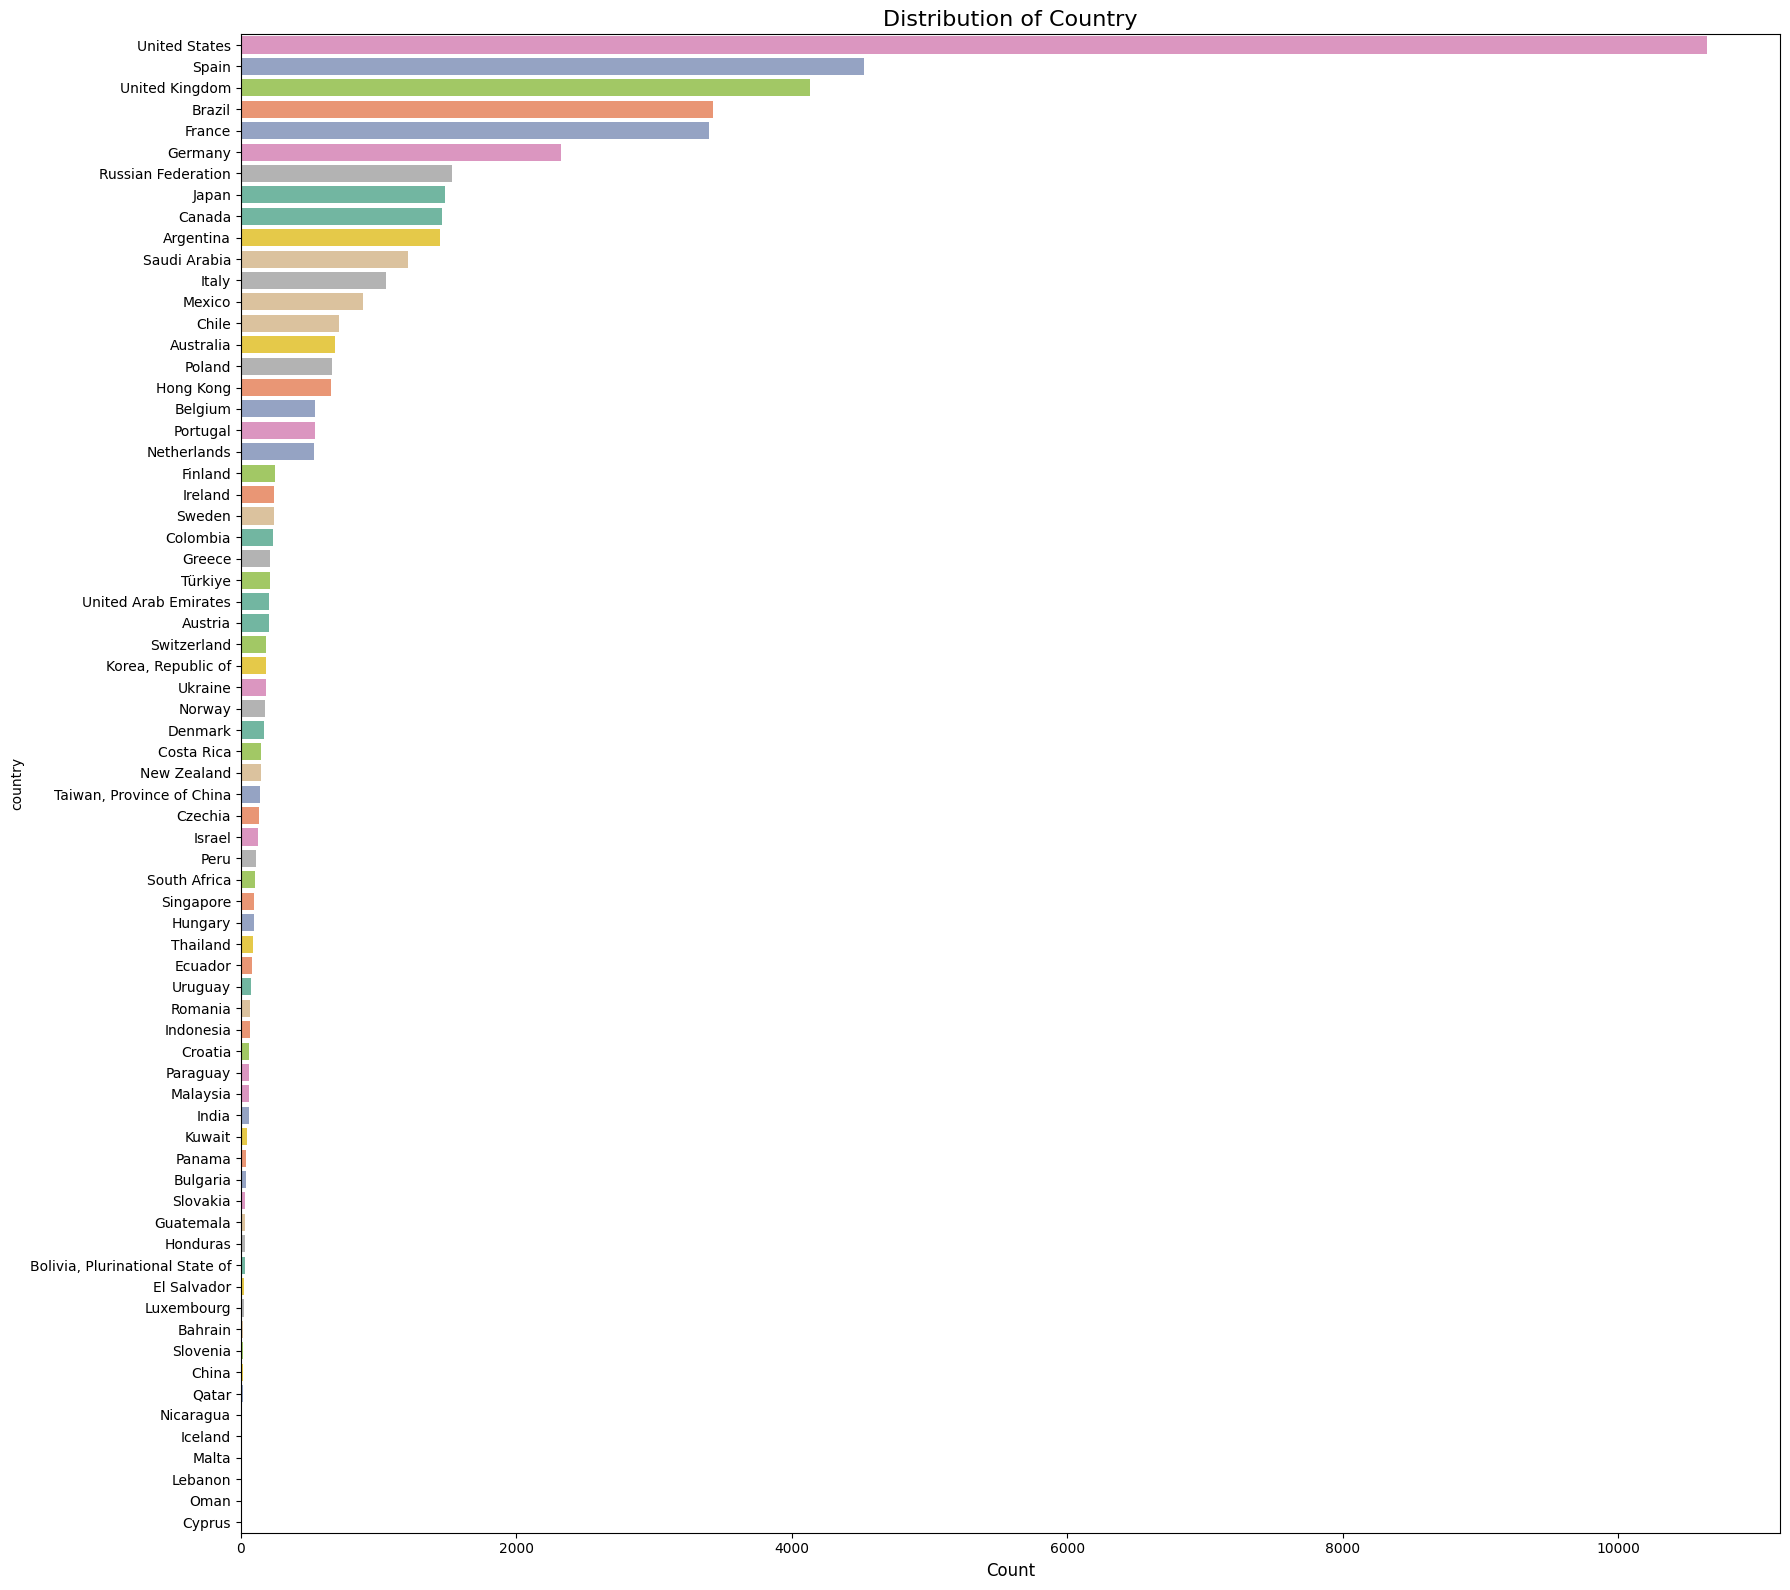

In [72]:
plt.figure(figsize=(18, 16))
sns.countplot(y='country', 
              data=df3, 
              palette='Set2', 
              order=df3['country'].value_counts().index, 
              hue=df3['country'])

plt.title('Distribution of Country', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/_p/dh58lykd67lcmvm4qc2hjfq00000gn/T/ipykernel_14719/3710217338.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_temp['last_achievement_date'] = pd.to_datetime(df_temp['last_achievement_date'], errors='coerce')


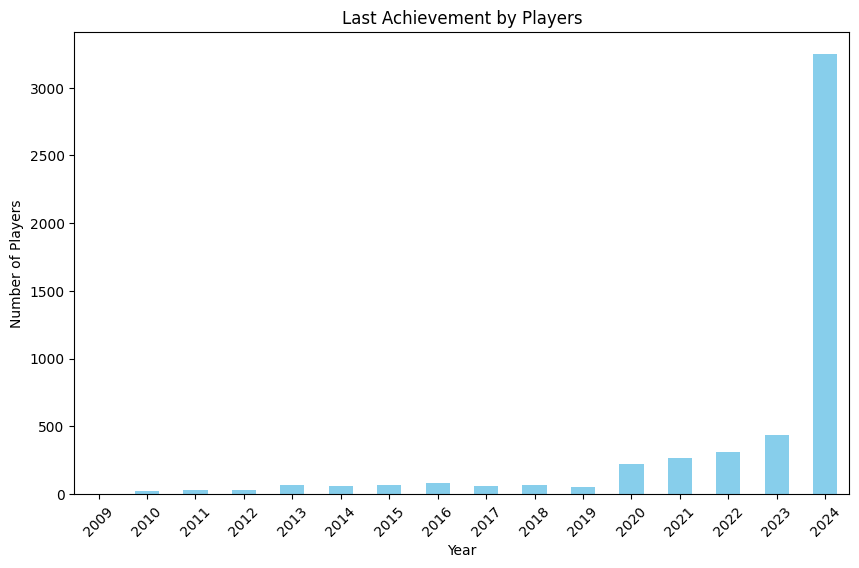

In [78]:
df_temp = df3.copy()
df_temp['last_achievement_date'] = pd.to_datetime(df_temp['last_achievement_date'], errors='coerce')
df_temp = df_temp.dropna(subset=['last_achievement_date'])
df_temp['last_achievement_date'] = pd.to_datetime(df_temp['last_achievement_date'])
df_temp['year'] = df_temp['last_achievement_date'].dt.year

nickname_counts_by_year = df_temp.groupby('year')['nickname'].nunique()

plt.figure(figsize=(10, 6))
nickname_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Last Achievement by Players')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

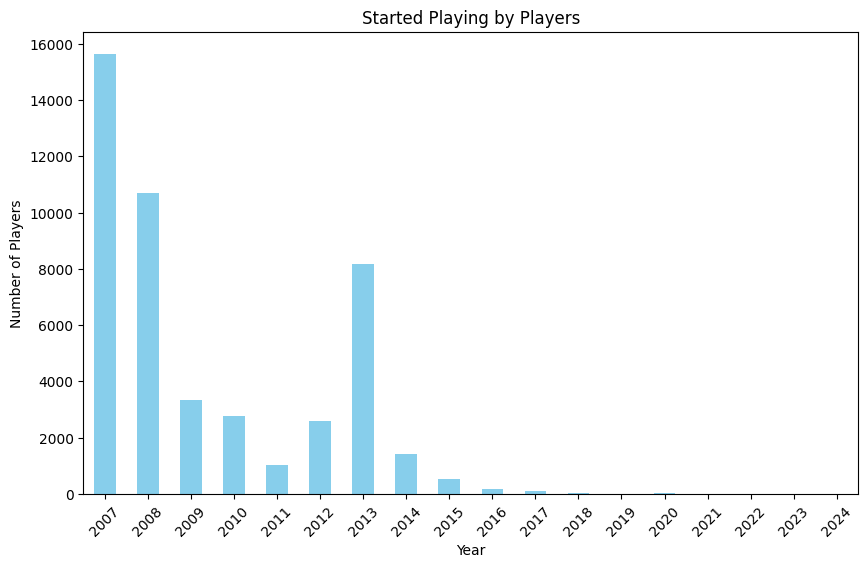

In [79]:
df_temp = df3.copy()
df_temp['started_played_on'] = pd.to_datetime(df_temp['started_played_on'], errors='coerce')
df_temp = df_temp.dropna(subset=['started_played_on'])
df_temp['started_played_on'] = pd.to_datetime(df_temp['started_played_on'])
df_temp['year'] = df_temp['started_played_on'].dt.year

nickname_counts_by_year = df_temp.groupby('year')['nickname'].nunique()

plt.figure(figsize=(10, 6))
nickname_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Started Playing by Players')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

TODO: Review high correlated values, null and outliers

Notes:
* Pearson Correlation (for continuous variables)
* Chi-Square Test (for categorical variables)
* Cramer's V (to measure association between categorical variables)
* ANOVA (Analysis of Variance) (to compare means of multiple groups)

In [80]:
df3.head()

,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,231,0,0,0,action,9794.040024,0,No Value,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,867,0,0,0,indie,24707.549618,0,No Value,2009-11-17,Hong Kong,Kevins_J
2,253885,50,0,0,0,shooter,1671.651601,0,No Value,2009-11-10,France,sebneau
3,1911732,137,19,442,2056,rpg,7140.931374,1,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,172,0,0,0,action,6010.800478,0,No Value,2012-05-15,United States,Kidokyalu


## Applying Unsupervised ML models

### K-Means

In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [85]:
scaler = MinMaxScaler()

df4 = df3.copy()
df4 = df4.dropna()

label_encoder = LabelEncoder()
df4['most_played_genre'] = label_encoder.fit_transform(df4['most_played_genre'])

df4['last_achievement_date'] = pd.to_datetime(df4['last_achievement_date'], errors='coerce')
no_value_timestamp = pd.Timestamp('1970-01-01')
df4['last_achievement_date'] = df4['last_achievement_date'].fillna(no_value_timestamp)
df4['last_achievement_date'] = df4['last_achievement_date'].astype(int)

df4['started_played_on'] = pd.to_datetime(df4['started_played_on'], errors='coerce')
no_value_timestamp = pd.Timestamp('1970-01-01')
df4['started_played_on'] = df4['started_played_on'].fillna(no_value_timestamp)
df4['started_played_on'] = df4['started_played_on'].astype(int)

df4['country'] = label_encoder.fit_transform(df4['country'])

df4.drop(columns=['playerid', 'nickname'], inplace=True)

df5 = scaler.fit_transform(df4)
df5 = pd.DataFrame(df5, columns=df4.columns)

df5.head()

/var/folders/_p/dh58lykd67lcmvm4qc2hjfq00000gn/T/ipykernel_14719/3347636968.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df4['last_achievement_date'] = pd.to_datetime(df4['last_achievement_date'], errors='coerce')


,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country
0,0.016988,0.000000,0.000000,0.000000,0.000000,0.044796,0.00,0.000000,0.314756,0.956522
1,0.063963,0.000000,0.000000,0.000000,0.583333,0.113146,0.00,0.000000,0.154903,0.362319
2,0.003619,0.000000,0.000000,0.000000,0.861111,0.007570,0.00,0.000000,0.153785,0.289855
3,0.010045,0.003221,0.005494,0.028904,0.833333,0.032636,0.25,0.998468,0.284574,0.985507
4,0.012630,0.000000,0.000000,0.000000,0.000000,0.027457,0.00,0.000000,0.300224,0.985507


In [ ]:
# Find the optimal K
silhouette_avgs = []
min_k = 2

X = df5

for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K) 

Silhouette Coefficients for k = 2 is 0.28413180641085706
Silhouette Coefficients for k = 3 is 0.42643397132723954
Silhouette Coefficients for k = 4 is 0.4671924390932902
Silhouette Coefficients for k = 5 is 0.5297160479292518
Silhouette Coefficients for k = 6 is 0.5094613383984083
Silhouette Coefficients for k = 7 is 0.46136917743063366
Silhouette Coefficients for k = 8 is 0.50070868849797
Silhouette Coefficients for k = 9 is 0.48153260949360294
Optimal K is 5


Cluster Centers:
 [[ 1.83520014e-02 -5.59448321e-17  8.17488438e-17  5.98479599e-17
   1.57415119e-01  4.05547771e-02 -1.07205911e-15  2.80331314e-15
   1.70941290e-01  2.07917468e-01 -2.84217094e-14]
 [ 2.24988200e-02 -5.81132364e-17  8.69530142e-17  5.98479599e-17
   2.00098615e-02  5.07933112e-02 -1.12410081e-15  2.85882429e-15
   1.00794271e-01  8.96802654e-01  2.00000000e+00]
 [ 1.13223307e-02 -6.09321621e-17  9.45424294e-17  6.07153217e-17
   7.51109895e-01  2.87042233e-02 -8.88178420e-16  2.78943535e-15
   2.06988013e-01  7.07173199e-01  1.00000000e+00]
 [ 2.12218905e-02  1.27615955e-02  1.87756457e-02  4.96336298e-02
   1.84758642e-02  4.77967276e-02  2.58061658e-01  9.64584038e-01
   1.07911930e-01  6.16717509e-01  3.00000000e+00]
 [ 1.10825654e-02  5.11862408e-03  8.43730191e-03  2.27875503e-02
   7.03733476e-01  2.71741896e-02  2.56660542e-01  9.73546993e-01
   2.27955160e-01  6.06418885e-01  4.00000000e+00]]

Data with cluster labels:
        purchased_games  highest_achiev

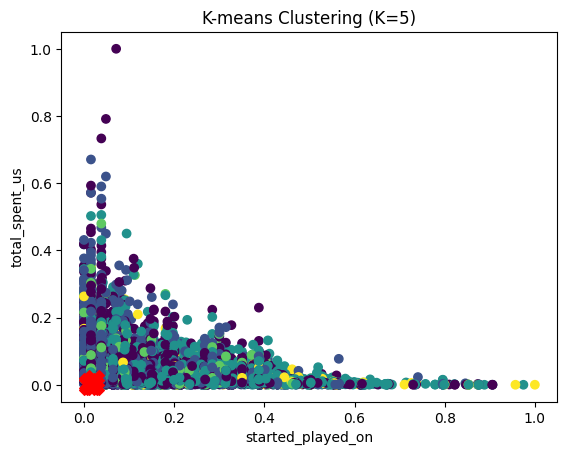

In [89]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df5)

centroids = kmeans.cluster_centers_
df5['cluster'] = kmeans.labels_

print("Cluster Centers:\n", centroids)
print("\nData with cluster labels:\n", df5)

plt.scatter(df5['started_played_on'], df5['total_spent_us'], c=df5['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.xlabel('started_played_on')
plt.ylabel('total_spent_us')
plt.title('K-means Clustering (K=5)')
plt.show()

In [92]:
df5.head()

,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,cluster
0,0.016988,0.000000,0.000000,0.000000,0.000000,0.044796,0.00,0.000000,0.314756,0.956522,1
1,0.063963,0.000000,0.000000,0.000000,0.583333,0.113146,0.00,0.000000,0.154903,0.362319,2
2,0.003619,0.000000,0.000000,0.000000,0.861111,0.007570,0.00,0.000000,0.153785,0.289855,2
3,0.010045,0.003221,0.005494,0.028904,0.833333,0.032636,0.25,0.998468,0.284574,0.985507,4
4,0.012630,0.000000,0.000000,0.000000,0.000000,0.027457,0.00,0.000000,0.300224,0.985507,1


Temp: Trying without normalization

In [96]:
# Find the optimal K
silhouette_avgs = []
min_k = 2

X = df4

for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K) 

Silhouette Coefficients for k = 2 is 0.9447853795242848
Silhouette Coefficients for k = 3 is 0.7944527831416072
Silhouette Coefficients for k = 4 is 0.7501419048260117
Silhouette Coefficients for k = 5 is 0.6943138948307315
Silhouette Coefficients for k = 6 is 0.7082321496121761
Silhouette Coefficients for k = 7 is 0.6901891286617761
Silhouette Coefficients for k = 8 is 0.6969198985655475
Silhouette Coefficients for k = 9 is 0.6497767663008879
Optimal K is 2


Cluster Centers:
 [[ 2.34569473e+02 -6.61692923e-13  7.47490958e-12  4.86579665e-11
   1.15459947e+01  8.69829888e+03 -9.00668429e-15  3.00800000e+03
   1.26140097e+18  4.21762569e+01 -8.46545056e-16]
 [ 2.28541108e+02  5.56463293e+01  1.14825465e+03  2.69888858e+03
   1.14082817e+01  8.48930656e+03  1.02980596e+00  1.68075941e+18
   1.26127626e+18  4.22440488e+01  1.00000000e+00]]

Data with cluster labels:
        purchased_games  highest_achievements  medium_achievements  \
0                  231                     0                    0   
1                  867                     0                    0   
2                   50                     0                    0   
3                  137                    19                  442   
4                  172                     0                    0   
...                ...                   ...                  ...   
46577               87                     0                    0   
46578               99             

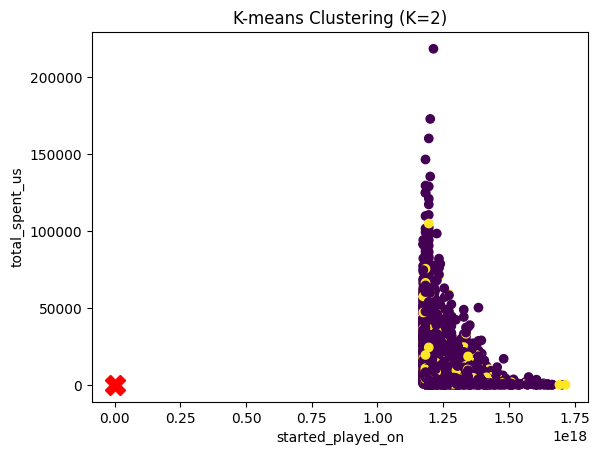

In [99]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df4)

centroids = kmeans.cluster_centers_
df4['cluster'] = kmeans.labels_

print("Cluster Centers:\n", centroids)
print("\nData with cluster labels:\n", df4)

plt.scatter(df4['started_played_on'], df4['total_spent_us'], c=df4['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.xlabel('started_played_on')
plt.ylabel('total_spent_us')
plt.title('K-means Clustering (K=2)')
plt.show()

In [98]:
df4.head()

,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,cluster
0,231,0,0,0,0,9794.040024,0,0,1344902400000000000,66,0
1,867,0,0,0,21,24707.549618,0,0,1258416000000000000,25,0
2,50,0,0,0,31,1671.651601,0,0,1257811200000000000,20,0
3,137,19,442,2056,30,7140.931374,1,1732789404000000000,1328572800000000000,68,1
4,172,0,0,0,0,6010.800478,0,0,1337040000000000000,68,0
